<div style="text-align: center; font-weight: bold ; ">
    
# Code Alpha Task 1


# Titanic Survival Prediction
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")


<div style="font-family: Arial, sans-serif; text-align: center;">

## Exploratory Data Analysis

</div>

In [3]:
df= pd.read_csv("C:\\data science\\CodeAlpha\\Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# for Checking how many null values are in columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# dropping cabin column because there are too many null values which show it does not impact on the pessenger survived or not

df = df.drop(columns= 'Cabin', axis=1)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# filling missing values in column Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
# filling missing values in column Fare with mean
# Fill NaNs in the 'Embarked' column with the mode value
mode_embarked = df['Embarked'].mode()[0]  # Get the mode value
df['Embarked'].fillna(mode_embarked, inplace=True)


In [13]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

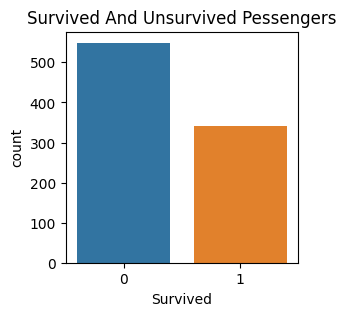

In [17]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'Survived', data = df).set_title('Survived And Unsurvived Pessengers')
plt.show()

In [18]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Text(0.5, 1.0, 'Pessenger Survived in different Clasess')

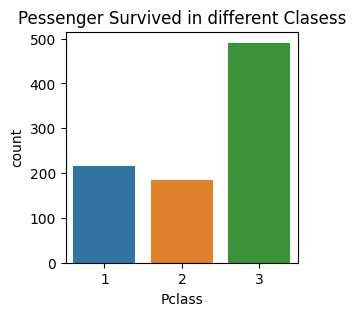

In [19]:
plt.figure(figsize=(3,3))
sns.countplot(x= 'Pclass' , data= df).set_title("Pessenger Survived in different Clasess")

In [20]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

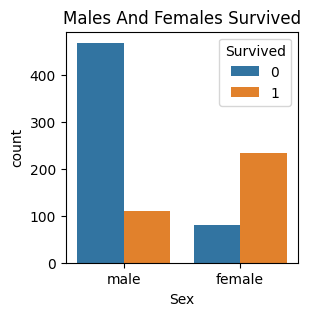

In [21]:
plt.figure(figsize=(3,3))
sns.countplot(x= 'Sex', hue= 'Survived', data= df ).set_title('Males And Females Survived')
plt.show()

In [22]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

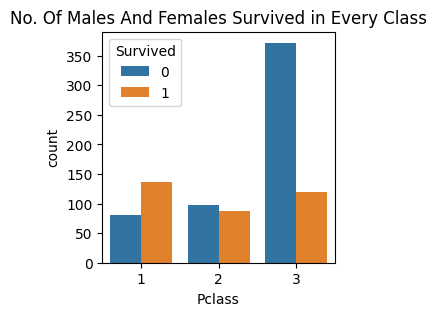

In [23]:
plt.figure(figsize=(3,3))
sns.countplot(x= 'Pclass', hue= 'Survived', data= df ).set_title('No. Of Males And Females Survived in Every Class')
plt.show()

In [24]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)


<div style="font-family: Arial, sans-serif; text-align: center;">

## Refinement

</div>

In [25]:
# encoding categorical data into numerical values
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [26]:
# Inspect unique values in the transformed 'Sex' column
print(df['Sex'].unique())

# Inspect unique values in the transformed 'Embarked' column
print(df['Embarked'].unique())



[1 0]
[2 0 1]


In [27]:
# storing columns in dependant and independant variable where X is independant and Y is independant.
X = df.drop(columns=['Name','Survived','Ticket','PassengerId'],axis=1)
Y = df['Survived']

In [28]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [29]:
# noramlizing the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
#Y=Y.values.reshape(-1,1)

In [31]:
X_train,X_test,Y_train,Y_test= train_test_split(X_scaled,Y, test_size=0.3,random_state=42,shuffle=True)

In [32]:
print("Shape of X train ",X_train.shape)
print("Shape of X train ",Y_train.shape)
print("Shape of X train ",X_test.shape)
print("Shape of X train ",Y_test.shape)

Shape of X train  (623, 7)
Shape of X train  (623,)
Shape of X train  (268, 7)
Shape of X train  (268,)



<div style="font-family: Arial, sans-serif; text-align: center;">

## Model Implementation

</div>

<div style="font-family: Arial, sans-serif; text-align: center;">

### Logistic Regression

</div>

In [33]:
# Training a model
logistic_reg= LogisticRegression()
logistic_reg.fit(X_train,Y_train)


LogisticRegression()

In [34]:
Y_pred_lg = logistic_reg.predict(X_test)
Y_pred_lg

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [35]:
accuracy = accuracy_score(Y_test,Y_pred_lg)
print(f" Accuracy Score is : {accuracy} " )

 Accuracy Score is : 0.8134328358208955 


 Confusin Matrix: 
 [[137  20]
 [ 30  81]] 


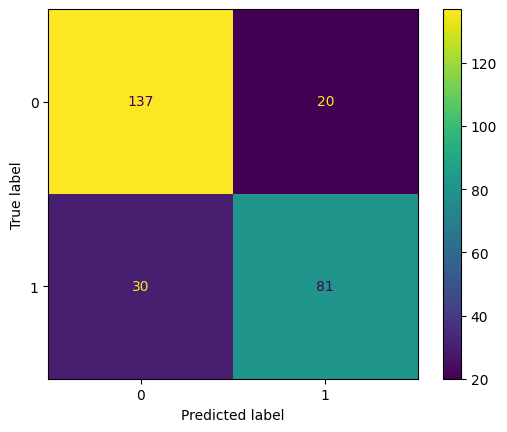

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_lg)
conf_matrix= confusion_matrix(Y_test,Y_pred_lg)
print(f" Confusin Matrix: \n {conf_matrix} ")

In [57]:
classification_rep = classification_report(Y_test,Y_pred_lg)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



<div style="font-family: Arial, sans-serif; text-align: center;">

### Random Forest Classifier

</div>

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [60]:
Y_pred_rf = rf.predict(X_test)

In [61]:
print("Accurracy score ", accuracy_score(Y_pred_rf,Y_test))

Accurracy score  0.7985074626865671


[[136  33]
 [ 21  78]]


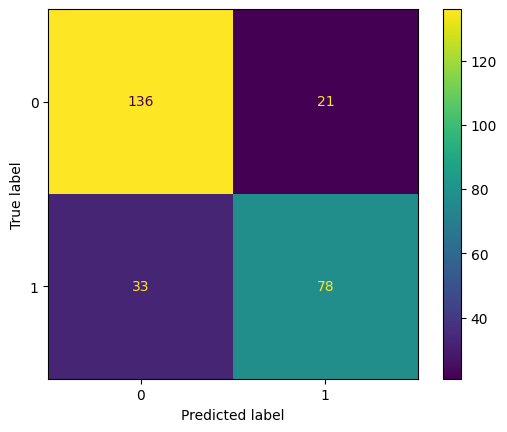

In [62]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_rf)
print(confusion_matrix(Y_pred_rf,Y_test))

In [63]:
print("Classification report \n",classification_report(Y_pred_rf,Y_test))

Classification report 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       169
           1       0.70      0.79      0.74        99

    accuracy                           0.80       268
   macro avg       0.78      0.80      0.79       268
weighted avg       0.81      0.80      0.80       268



<div style="font-family: Arial, sans-serif; text-align: center;">

### Support Vector Machine

</div>

In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC()
svc.fit(X_train,Y_train)

SVC()

In [66]:
Y_pred_svc = svc.predict(X_test)

In [67]:
print("Accuracy Score ",accuracy_score(Y_test,Y_pred_svc))

Accuracy Score  0.8171641791044776


[[136  21]
 [ 33  78]]


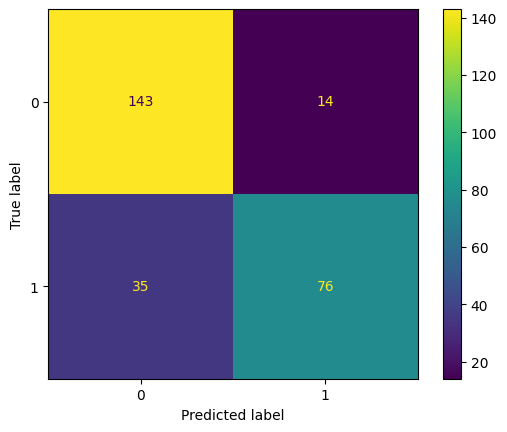

In [68]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_svc)
print(confusion_matrix(Y_test,Y_pred_rf))

In [69]:
print("Classification report \n",classification_report(Y_test,Y_pred_svc))

Classification report 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       157
           1       0.84      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



<div style="font-family: Arial, sans-serif; text-align: center;">

### Decision Tree Classifier

</div>

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,max_features=4,max_leaf_nodes=4,min_samples_leaf=10)

In [72]:
clf_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, max_features=4, max_leaf_nodes=4,
                       min_samples_leaf=10)

In [73]:
Y_pred_Clf = clf_gini.predict(X_test)

In [74]:
print("Accuracy ",accuracy_score(Y_test,Y_pred_Clf))

Accuracy  0.8097014925373134


[[141  16]
 [ 35  76]]


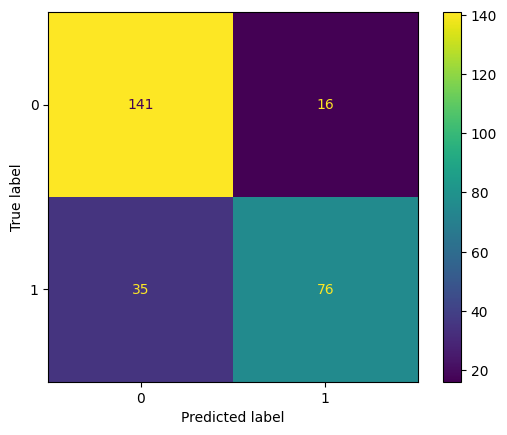

In [75]:
ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_Clf)
print(confusion_matrix(Y_test,Y_pred_Clf))

In [76]:
print("Classification report \n",classification_report(Y_test,Y_pred_Clf))

Classification report 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [77]:
import joblib

In [78]:
joblib.dump(logistic_reg,'model1.pk1')

['model1.pk1']

In [79]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)


Current working directory: C:\Users\ahzam\CodeAlpha


In [80]:
joblib.dump(df['Sex'],'sex_encoder.pk1')

['sex_encoder.pk1']

In [81]:
joblib.dump(df['Embarked'],'embarked.pk1')

['embarked.pk1']